# Basic Test

In [1]:

from imports import *
from agents import *
from environment import *
from simulations import *
from utils import *
from stationarity_analysis import *

# Environment Testing

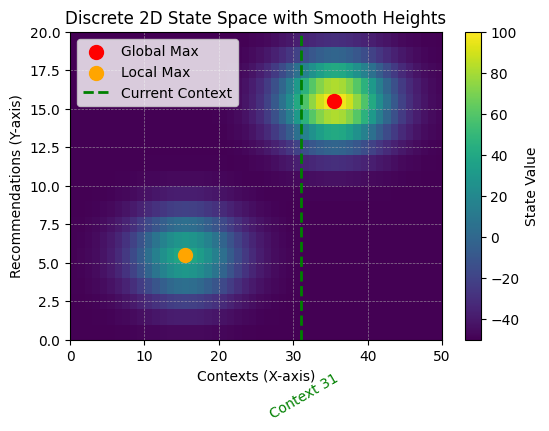

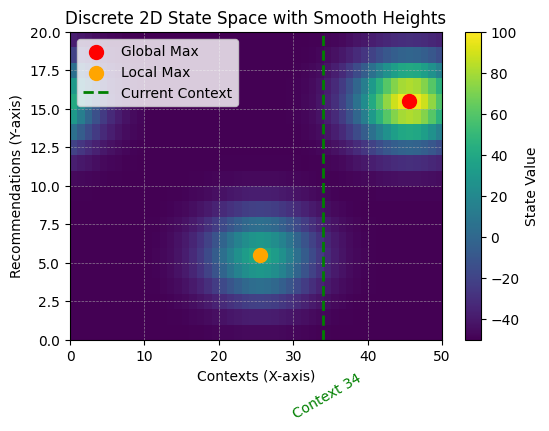

[31, np.int64(34), np.int64(33), np.int64(36), np.int64(37), np.int64(41), np.int64(40), np.int64(41), np.int64(42), np.int64(39), np.int64(34)]


In [2]:
ere = ExogenousRewardEnvironment()
ere.do_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

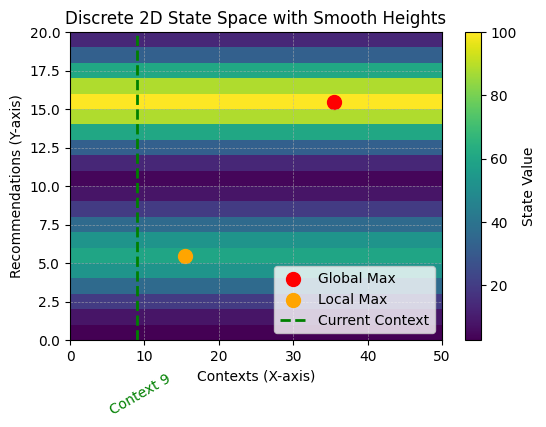

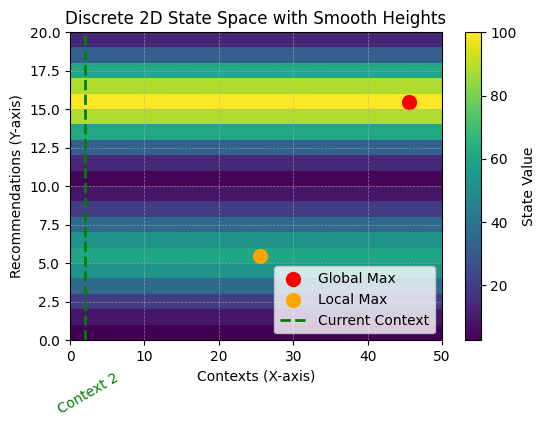

[9, np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(2), np.int64(4), np.int64(5), np.int64(3), np.int64(0), np.int64(2)]


In [3]:
ere = ExogenousRewardEnvironment()
ere.do_rows_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

# Simulation Testing

## Stationary, Initiation, No Modulation

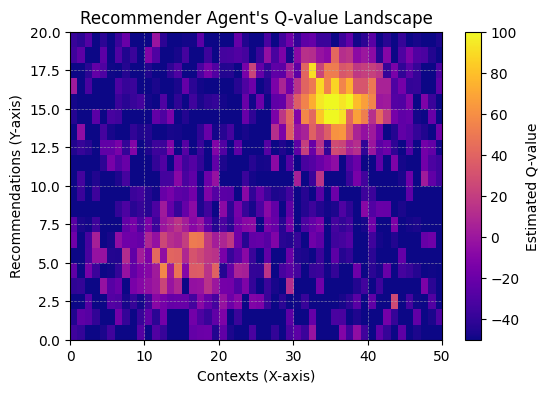

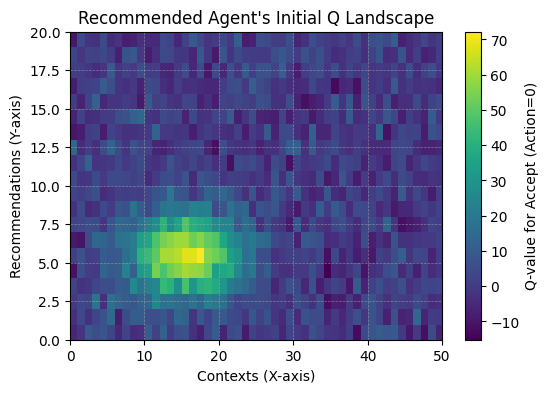

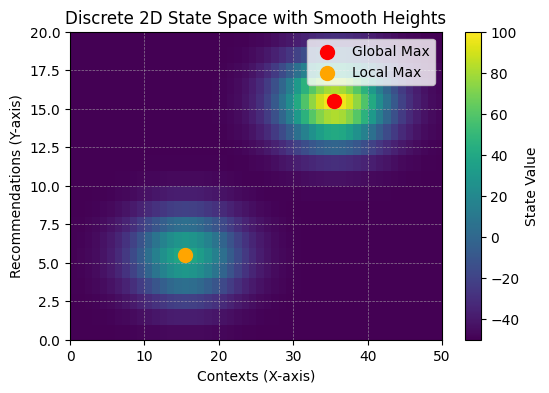

Running Simulation: 100%|██████████| 100000/100000 [00:12<00:00, 8083.32it/s]


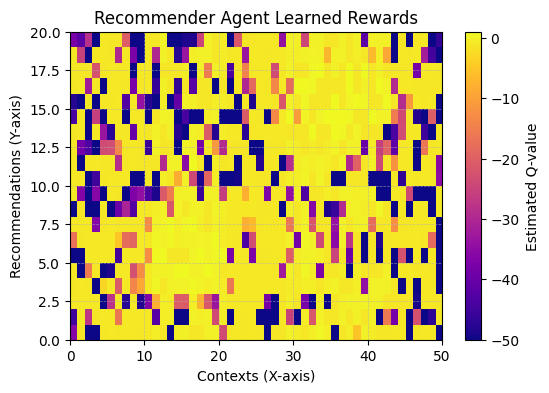

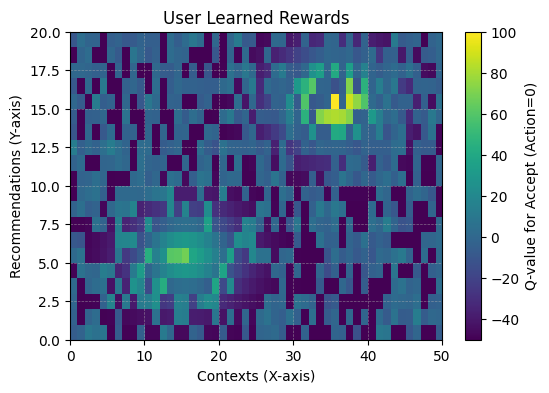

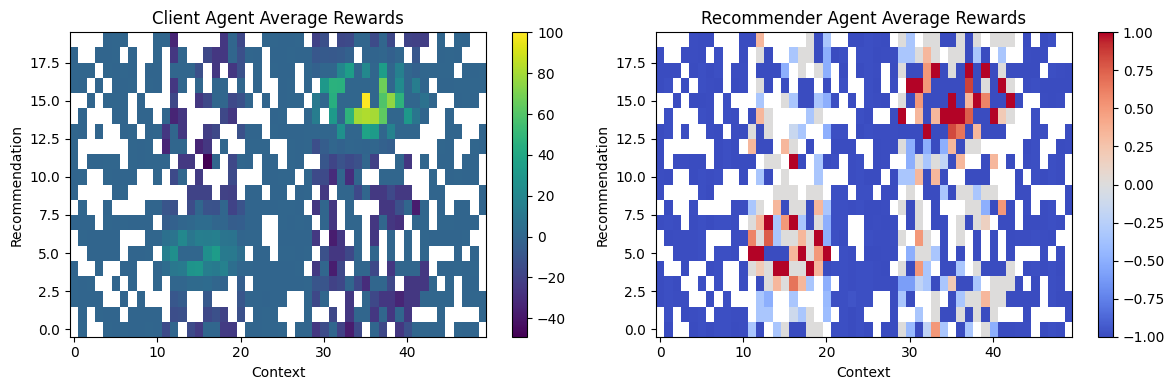

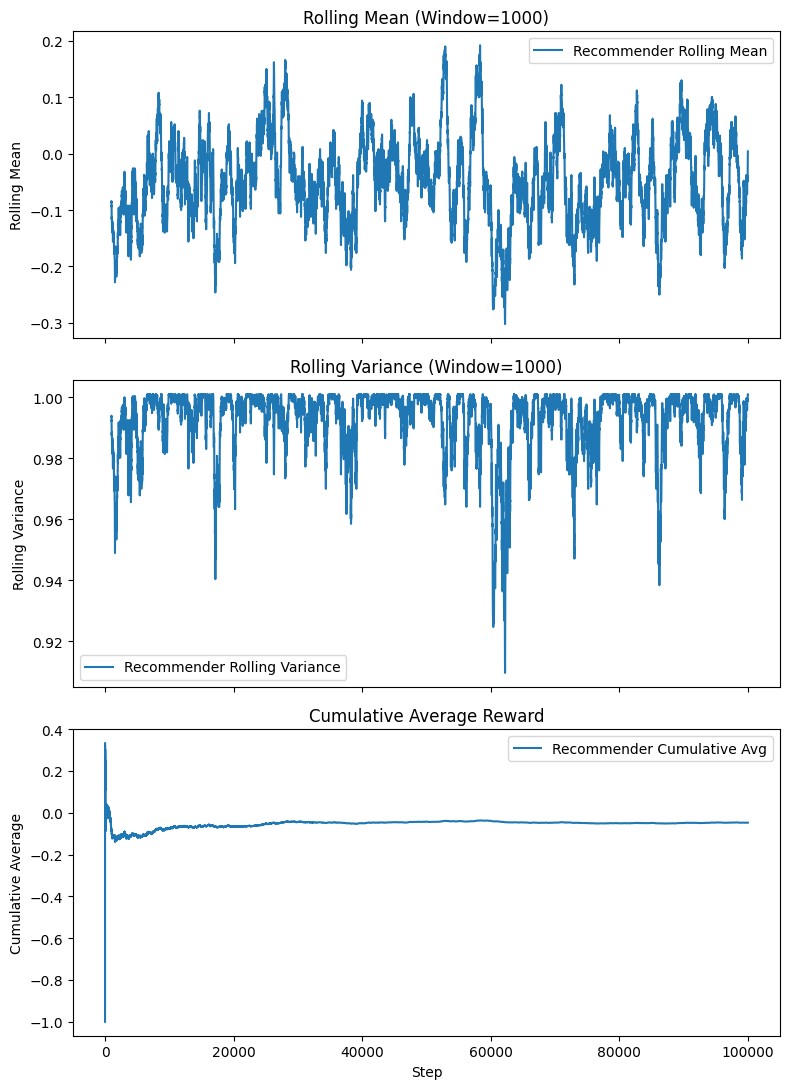

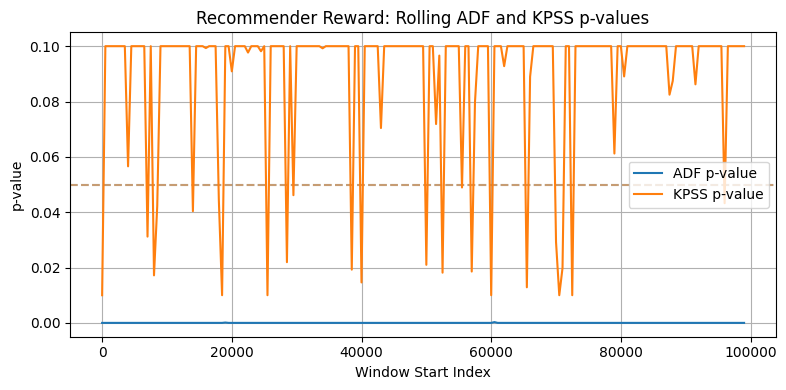

/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


    context    adf_pvalue  kpss_pvalue
0         0  0.000000e+00     0.022833
1         1  2.355788e-30     0.010286
2         2  1.195135e-13     0.015371
3         3  1.030801e-12     0.010000
4         4  7.229378e-15     0.010000
5         5  1.404881e-26     0.010000
6         6  3.102404e-09     0.010000
7         7  1.031420e-15     0.010000
8         8  3.536422e-18     0.012673
9         9  5.589845e-17     0.032763
10       10  6.526974e-25     0.010000
11       11  4.364601e-17     0.010000
12       12  2.584868e-13     0.010000
13       13  1.008163e-15     0.024841
14       14  0.000000e+00     0.026945
15       15  1.030994e-13     0.010000
16       16  1.498809e-11     0.018019
17       17  0.000000e+00     0.016364
18       18  1.068231e-29     0.010000
19       19  2.956747e-26     0.010000
20       20  3.717801e-12     0.010000
21       21  1.648248e-19     0.014249
22       22  2.661580e-30     0.019494
23       23  5.142614e-20     0.010000
24       24  2.945488e-23

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Non-Stationary, Initiation, No Modulation



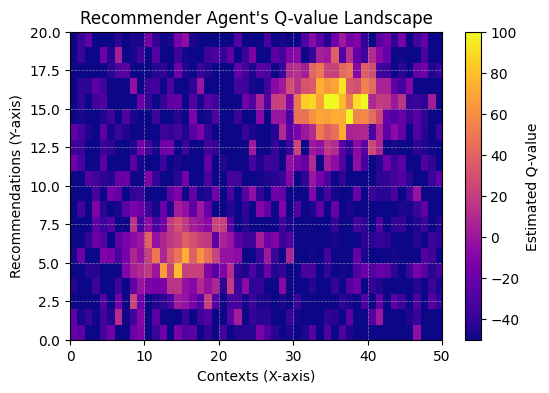

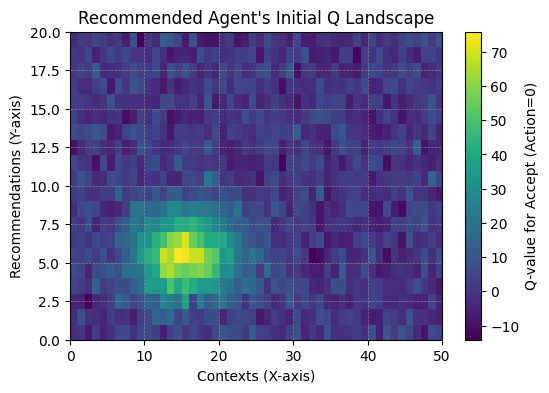

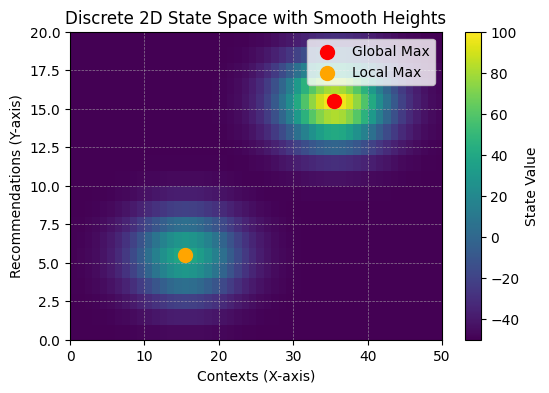

Running Simulation: 100%|██████████| 1000000/1000000 [03:15<00:00, 5125.40it/s]


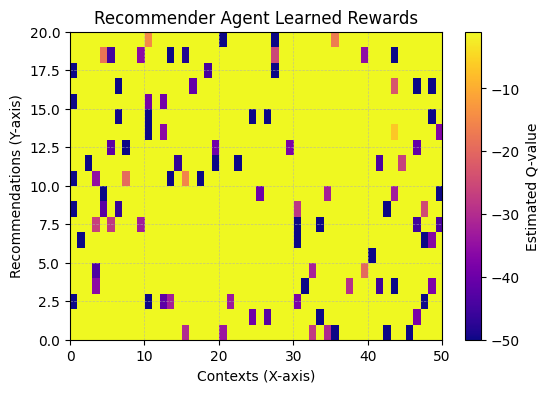

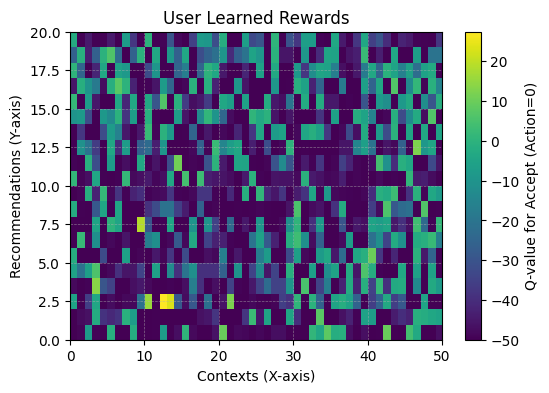

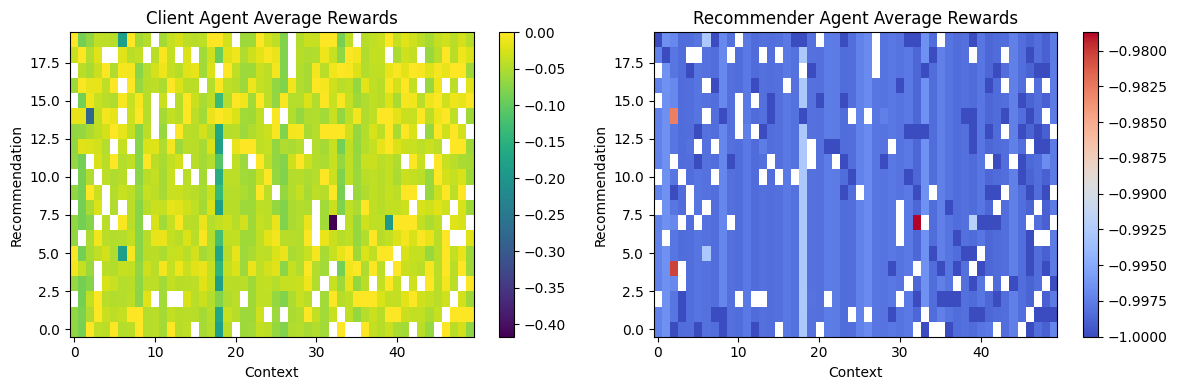

/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/s

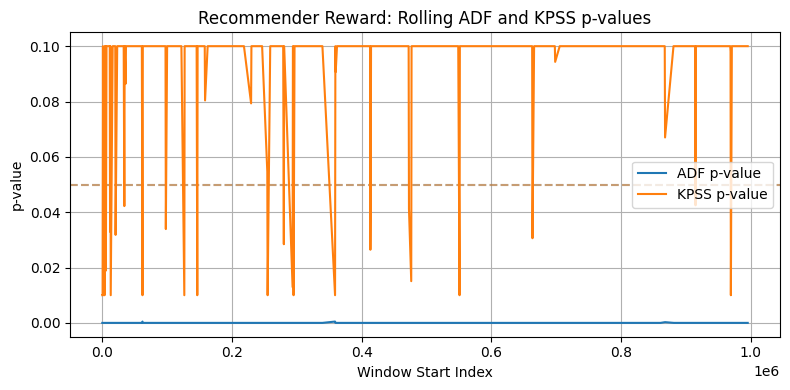

    context    adf_pvalue  kpss_pvalue
0         0  0.000000e+00     0.095371
1         1  0.000000e+00     0.100000
2         2  0.000000e+00     0.100000
3         3  0.000000e+00     0.014301
4         4  0.000000e+00     0.052138
5         5  0.000000e+00     0.056425
6         6  0.000000e+00     0.047567
7         7  0.000000e+00     0.073733
8         8  0.000000e+00     0.010000
9         9  0.000000e+00     0.100000
10       10  0.000000e+00     0.037272
11       11  0.000000e+00     0.010977
12       12  0.000000e+00     0.066067
13       13  0.000000e+00     0.100000
14       14  0.000000e+00     0.100000
15       15  0.000000e+00     0.043023
16       16  0.000000e+00     0.072285
17       17  0.000000e+00     0.056166
18       18  7.395029e-28     0.016615
19       19  0.000000e+00     0.043224
20       20  0.000000e+00     0.020737
21       21  0.000000e+00     0.034460
22       22  0.000000e+00     0.025120
23       23  0.000000e+00     0.028548
24       24  0.000000e+00

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended= True,
                                    landscape_type='default',
                                    stationarity=False, type='ucb', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Stationary, Initiation, Moody Modulation

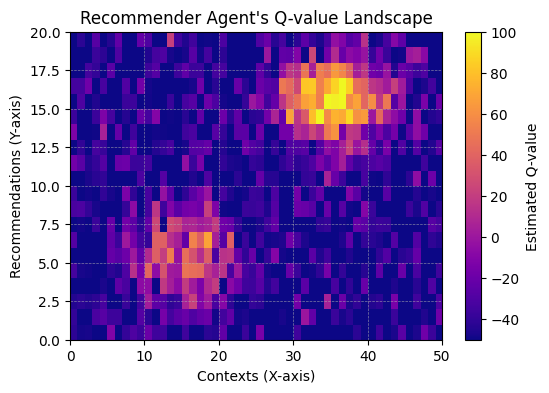

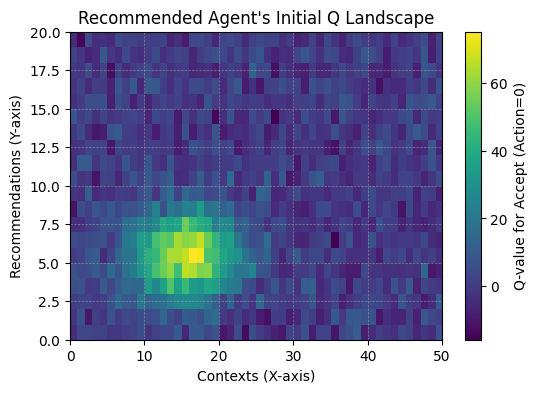

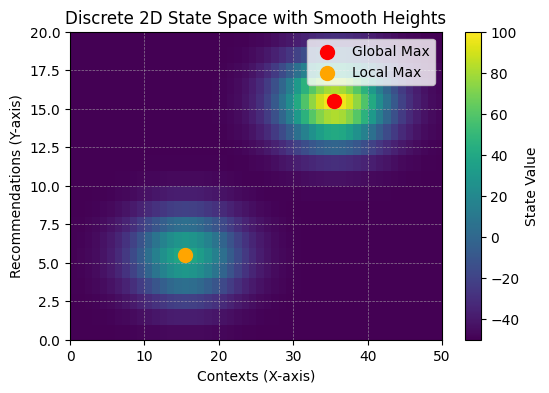

Running Simulation: 100%|██████████| 100000/100000 [00:11<00:00, 8496.41it/s]


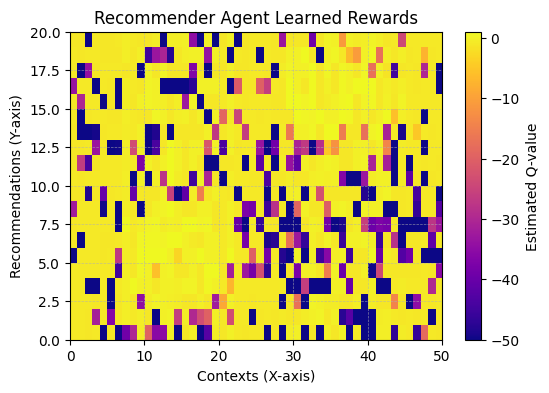

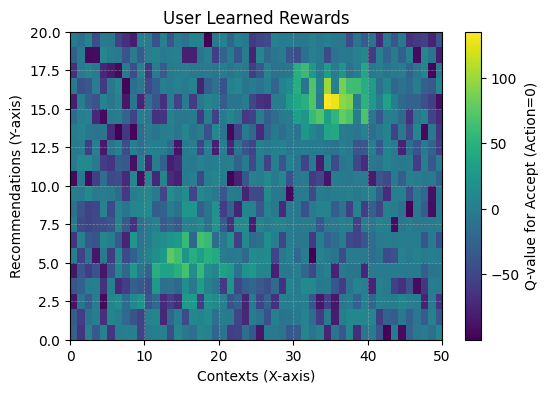

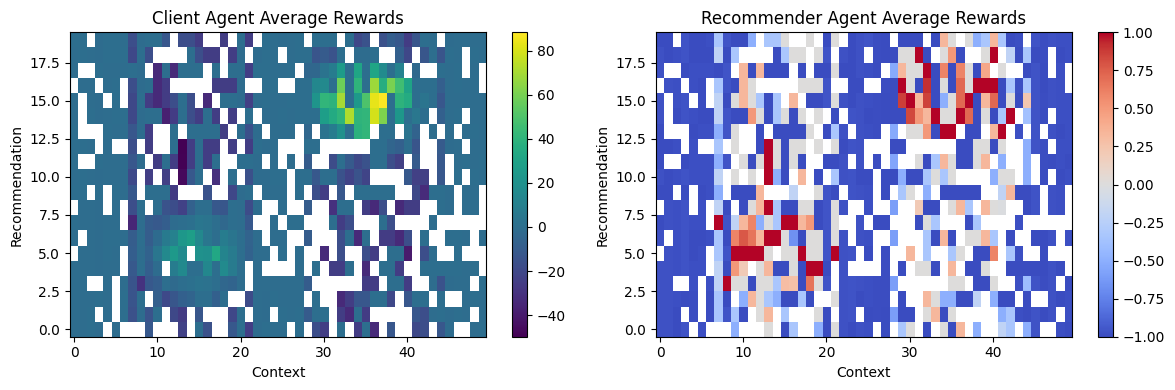

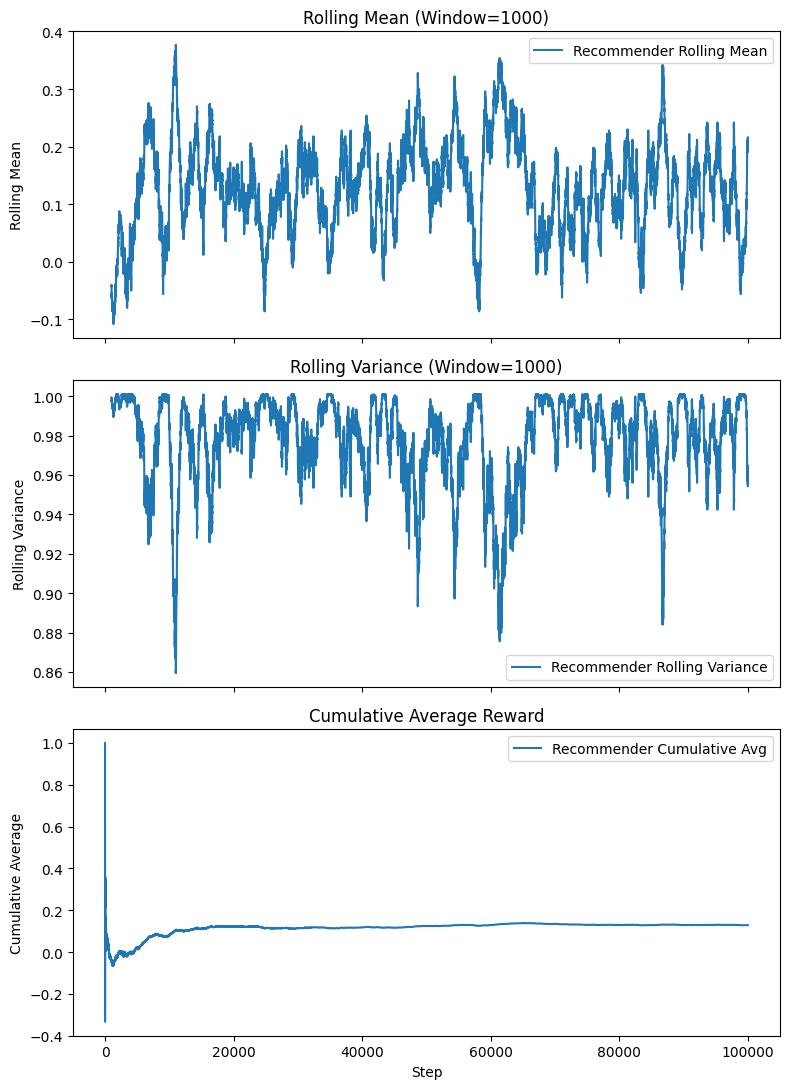

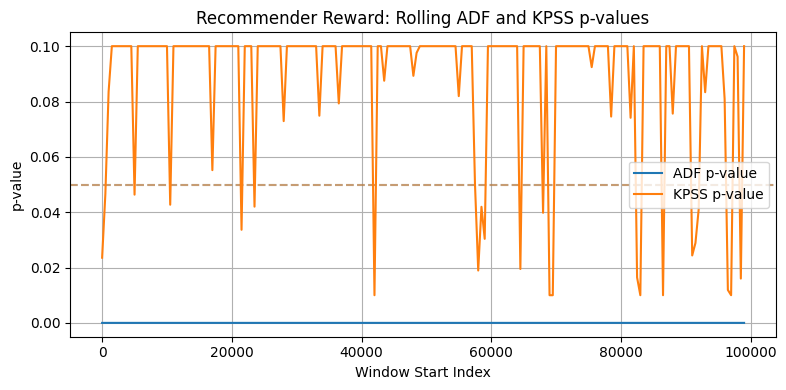

    context    adf_pvalue  kpss_pvalue
0         0  1.531805e-12     0.010000
1         1  8.364982e-06     0.010000
2         2  0.000000e+00     0.010553
3         3  1.541641e-10     0.010000
4         4  1.208987e-27     0.010000
5         5  3.636486e-28     0.014258
6         6  5.341322e-21     0.011005
7         7  1.294173e-04     0.010000
8         8  6.029512e-01     0.010000
9         9  4.530231e-29     0.010000
10       10  1.604938e-28     0.010000
11       11  3.620155e-14     0.010000
12       12  1.587724e-22     0.010000
13       13  0.000000e+00     0.041939
14       14  2.597736e-11     0.015465
15       15  1.329740e-11     0.010123
16       16  1.734004e-25     0.010000
17       17  0.000000e+00     0.039235
18       18  0.000000e+00     0.014827
19       19  3.250991e-09     0.010000
20       20  2.250933e-07     0.010000
21       21  0.000000e+00     0.013962
22       22  1.208592e-13     0.010000
23       23  2.162031e-11     0.010000
24       24  1.761784e-17

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Stationary, Initiation, Homeostatic Modulation

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 100000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)